### Basic ISC



#### Import modules

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys, os, nilearn, pickle, glob,shutil
from nilearn import plotting, input_data, datasets
import numpy as np
import pandas as pd
from statsmodels.stats.multitest import multipletests
from utils import *
import warnings
import time

warnings.simplefilter("ignore")

#### Load timeseries, run basic ISC (static)

In [6]:
twin_df = pd.read_csv('../data/00_dataset_info/twin_df.csv')
sub_list = list(np.hstack((twin_df['twin_A_id'].values, twin_df['twin_B_id'].values)))
len(sub_list)

200

In [7]:
start = 0
end = 124045
interval_size = 10000

interval_onsets = np.arange(start, end, interval_size)
interval_offsets = np.append(interval_onsets[1:], end)

#for curr_int in range(len(interval_onsets)):
#    print(interval_onsets[curr_int])
#    print(interval_offsets[curr_int])
#    print('---')

In [9]:
for curr_int in range(len(interval_onsets)):
    #curr_int = 1
    curr_onset  = interval_onsets[curr_int]
    curr_offset = interval_offsets[curr_int]
    curr_length = curr_offset - curr_onset
        
    print(curr_onset)
    print(curr_offset)
    print(curr_length)
    
    curr_interval_appendix = '_voxels_' + str(curr_onset) + '-' + str(curr_offset) 
    print(curr_interval_appendix)
        
    loadname =  '/Volumes/Backup Plus/twins_partly_cloudy_extracted/ts_array_200subs_wholebrain' + curr_interval_appendix + '.npy'
    ts_data =  np.load(loadname)

    print(ts_data.shape)
    print("should be (380, 10000, 200) ")

    print("Memory size of numpy array in bytes:",
          ts_data.size * ts_data.itemsize/1000000)

    ts_data = ts_data.astype(np.float32)
    #ts_data.shape


    # submit to ISC analysis
    
    start = time.time()
    print("hello")
    
    #data input shape should be 380 * 124045 * 200 
    
    # takes about 15-20 minutes on normal machine
    ISC, p, distribution = partly_phaseshift_isc(ts_data, 
                                               pairwise= False,
                                               summary_statistic = np.mean,
                                               n_shifts = 1,#000, #can reduce to speed up, better increase to 1000
                                               return_distribution=True)
    
    ISC[np.isnan(ISC)] = 0
    
    end = time.time()
    print(end - start)
    
    # Stats correction (uncomment if you computed enough n_shifts)
    alpha                           = .05
    q                               = multipletests(p[0, :], method='fdr_by')[1]
    corrected                       = q[np.newaxis, :] < alpha
    #ISC[corrected == False]         = 0
    
    isc_result_dict                 = {}
    isc_result_dict['ISC']          = ISC
    isc_result_dict['p']            = p
    isc_result_dict['distribution'] = distribution
    
    curr_pickle_name = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/isc_result_dict' + curr_interval_appendix + '.pkl'
    with open(curr_pickle_name, 'wb') as f:
        pickle.dump(isc_result_dict, f)
    


0
10000
10000
_voxels_0-10000
(380, 10000, 200)
should be (380, 10000, 200) 
Memory size of numpy array in bytes: 6080.0
hello
2435.68084025383
10000
20000
10000
_voxels_10000-20000
(380, 10000, 200)
should be (380, 10000, 200) 
Memory size of numpy array in bytes: 6080.0
hello
2314.8476178646088
20000
30000
10000
_voxels_20000-30000
(380, 10000, 200)
should be (380, 10000, 200) 
Memory size of numpy array in bytes: 6080.0
hello
2040.3335227966309
30000
40000
10000
_voxels_30000-40000
(380, 10000, 200)
should be (380, 10000, 200) 
Memory size of numpy array in bytes: 6080.0
hello
2474.259442806244
40000
50000
10000
_voxels_40000-50000
(380, 10000, 200)
should be (380, 10000, 200) 
Memory size of numpy array in bytes: 6080.0
hello
1765.6125857830048
50000
60000
10000
_voxels_50000-60000
(380, 10000, 200)
should be (380, 10000, 200) 
Memory size of numpy array in bytes: 6080.0
hello
1586.5507230758667
60000
70000
10000
_voxels_60000-70000
(380, 10000, 200)
should be (380, 10000, 200) 
Me

In [11]:
# load timeseries
#ts_array = np.load('/Volumes/Backup Plus/twins_partly_cloudy_extracted/ts_array_200subs_wholebrain.npy')
#ts_data = np.swapaxes(ts_array, 0, 2)
#ts_data = np.swapaxes(ts_data, 0, 1)


(380, 10000, 200)

In [28]:
all_isc = np.zeros((1,1))

for curr_int in range(len(interval_onsets)):
    curr_onset  = interval_onsets[curr_int]
    curr_offset = interval_offsets[curr_int]
    curr_length = curr_offset - curr_onset
            
    print(curr_onset)
    print(curr_offset)
    print(curr_length)
        
    curr_interval_appendix = '_voxels_' + str(curr_onset) + '-' + str(curr_offset) 
    print(curr_interval_appendix)
            
    curr_pickle_name = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/isc_result_dict' + curr_interval_appendix + '.pkl'
    
    with open(curr_pickle_name, 'rb') as f:
      data = pickle.load(f)
    
    isc0 = data['ISC']
    
    all_isc = np.hstack((all_isc, isc0))


all_isc = all_isc[:, 1:]
all_isc.shape

0
10000
10000
_voxels_0-10000
10000
20000
10000
_voxels_10000-20000
20000
30000
10000
_voxels_20000-30000
30000
40000
10000
_voxels_30000-40000
40000
50000
10000
_voxels_40000-50000
50000
60000
10000
_voxels_50000-60000
60000
70000
10000
_voxels_60000-70000
70000
80000
10000
_voxels_70000-80000
80000
90000
10000
_voxels_80000-90000
90000
100000
10000
_voxels_90000-100000
100000
110000
10000
_voxels_100000-110000
110000
120000
10000
_voxels_110000-120000
120000
124045
4045
_voxels_120000-124045


(1, 124045)

#### Plot ISC results

In [29]:
#'''
from nilearn.maskers import NiftiMasker
brain_masker = NiftiMasker( #mask_img = mask_path,
                            detrend     = True, 
                            standardize = True,
                            high_pass   = 0.01, 
                            t_r         = 0.8, 
                            low_pass    = 0.12,
                            mask_strategy = 'whole-brain-template',
                          );
brain_masker.fit('/Volumes/Backup Plus/twins_fmriprep/sub-0001/ses-02/func/sub-0001_ses-02_task-partlycloudy_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')



NiftiMasker(detrend=True, high_pass=0.01, low_pass=0.12,
            mask_strategy='whole-brain-template', standardize=True, t_r=0.8)

<Figure size 2000x1500 with 0 Axes>

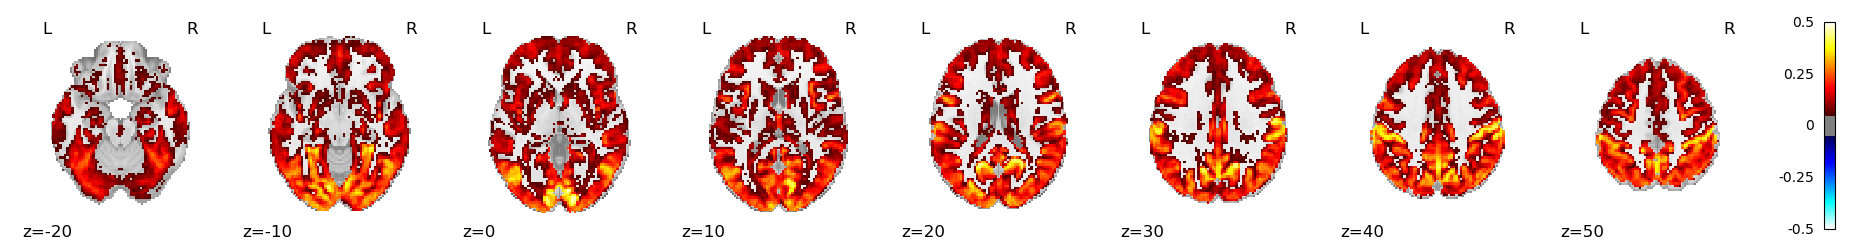

In [30]:
#curr_isc = isc_result_dict['ISC']  #np.reshape(ISC, (293,1)).T
curr_isc = all_isc
curr_img = brain_masker.inverse_transform(curr_isc);
plt.figure(figsize = (20,15));
nilearn.plotting.plot_stat_map(nilearn.image.index_img(curr_img,0), 
                                   threshold      = 0.05, 
                                   vmax           = 0.50, 
                                   draw_cross     = True,
                                   display_mode   = 'z',
                                   cut_coords     = [ -20, -10, 0, 10, 20,  30, 40, 50],
                                   symmetric_cbar = True,
                                   annotate       = True,);

plt.show(); #'''
print(' ' )